<a href="https://colab.research.google.com/github/OANInternational/projectcharts/blob/master/project_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este proyecto forma parte de la asignatura de Dirección de proyectos del master habilitante de Ingeniería Industrial 
Aqui esta el documento de trabajo, forma parte de una ONG llamada OAN International., podeis solicitar acceso al documento escribiendo a contacto@oaninternational.org (https://drive.google.com/open?id=1aRuH1gK6Qs-mvunuhEYnnhR25qvAA2j5)



Hacer un google Drive un directorio

In [1]:
%cd

/root


In [2]:
%cd
%cd ..
%cd content

/root
/
/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/'Team Drives'/'Comité de Infraestructuras, Energía y Agua'/'Proyectos'/'Red de Reparadores de Bombas Manuales'/'Prototipo Automatización'/'tasks and other charts'

/content/drive/Team Drives/Comité de Infraestructuras, Energía y Agua/Proyectos/Red de Reparadores de Bombas Manuales/Prototipo Automatización/tasks and other charts


In [0]:
import yaml
spreadsheet_ids = yaml.load( open("parameters.yaml", "r" ))
ID1=str(spreadsheet_ids['ID1'])
ID2=str(spreadsheet_ids['ID2'])
ID3=str(spreadsheet_ids['ID3'])
ID4=str(spreadsheet_ids['ID4'])

GSHEET & GDRIVE AUTHETICATION

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
sheet_service = build('sheets', 'v4')

IMPORTS

In [0]:
import plotly
import plotly.plotly as py
from plotly.figure_factory import create_gantt
import matplotlib.patches as mpatches
import numpy as np


import matplotlib.pyplot as plt

import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
import seaborn as sns


from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator

from matplotlib.sankey import Sankey
from pylab import *
from graphviz import Digraph


Get Data in a spreadsheet with tasks and dates of project (starting and ending)

In [0]:
SPREADSHEET_ID = ID1
RANGE_NAME = 'Sheet1'

gsheet = sheet_service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()

df = pd.DataFrame(gsheet.get('values', [])[1:],columns= gsheet.get('values', [])[0:1][0])

In [0]:
def create_date(day,month,year):
 
  date = dt.datetime(int(year), int(month), int(day))
  mdate = matplotlib.dates.date2num(date)

  return mdate

def cosa(x,a):

  if(a==0):
    return [create_date(x['Start'][8:10],x['Start'][5:7],x['Start'][0:4]),
                                  create_date(x['Start'][8:10],x['Finish'][5:7],x['Finish'][0:4])]
  return [create_date(x['Start'][8:10],x['Start'][5:7],x['Start'][0:4]),
                                  create_date(x['Finish'][8:10],x['Finish'][5:7],x['Finish'][0:4]),
                                  create_date(x['Finish'][8:10],x['Finish'][5:7],x['Finish'][0:4])] 

GANTT CHART OF ALL PROJECT

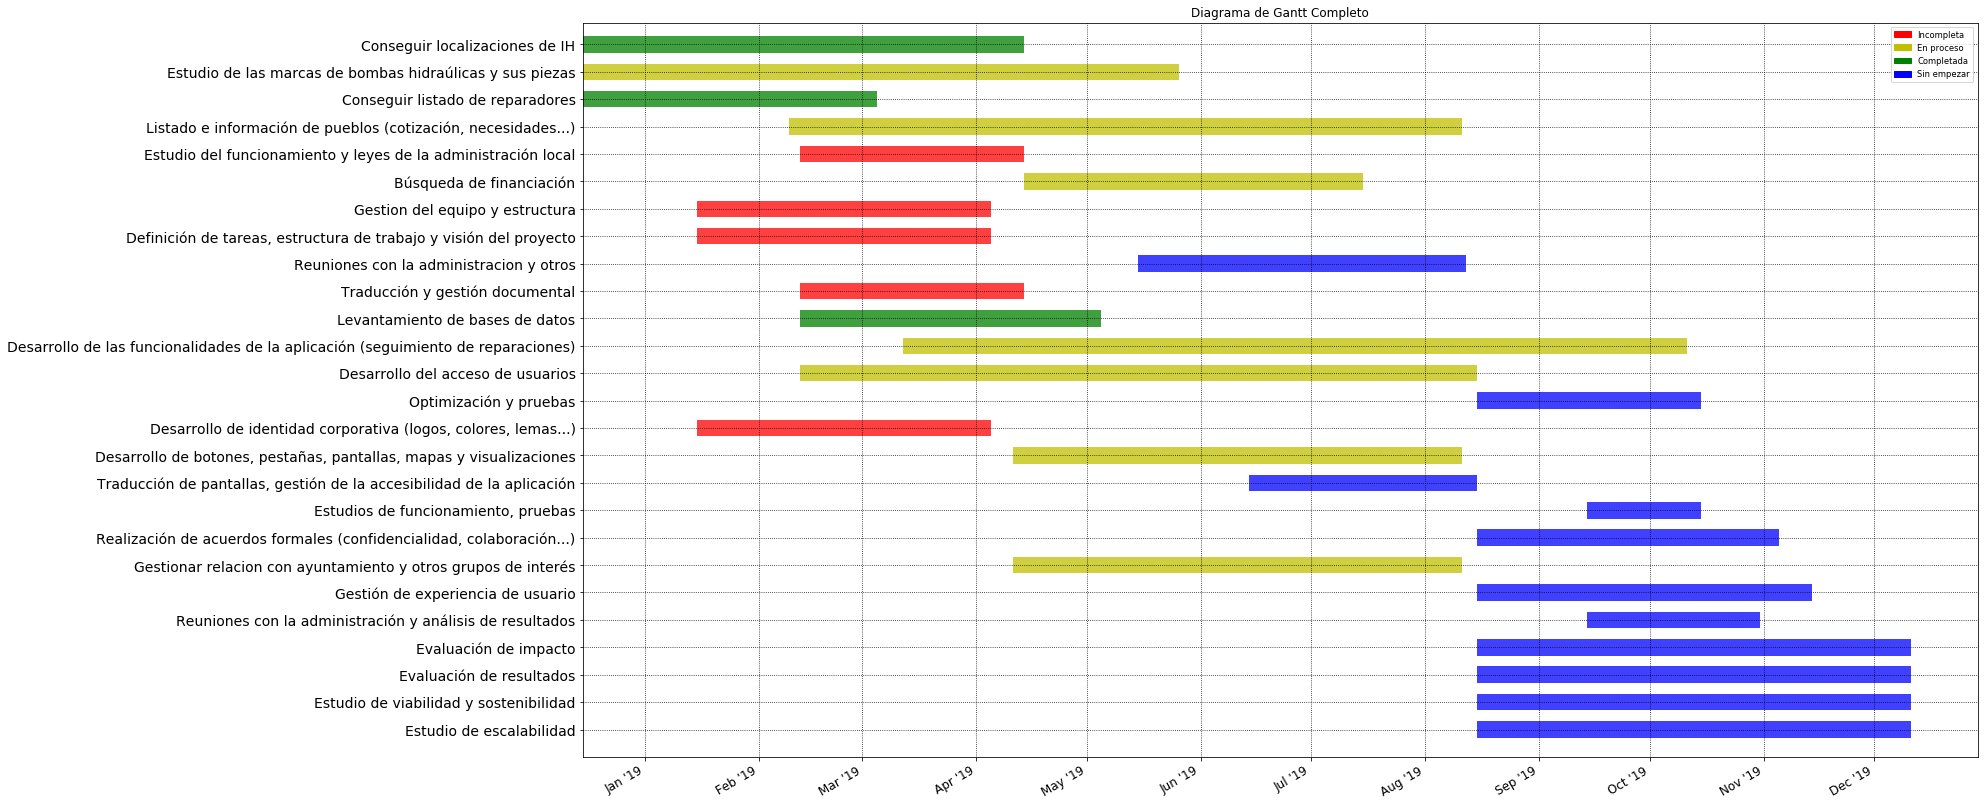

In [19]:

# Data
 
pos = np.arange(0.5,int(len(df)/2)+0.5,0.5)
 
ylabels = df['Task']



customDates = df[0:1].apply(lambda x: cosa(x,0),axis=1).append(df[1:].apply(lambda x: cosa(x,1),axis=1))
 
task_dates = {}
for i,task in enumerate(ylabels):
  task_dates[task] = customDates[i]

# Initialise plot
 
fig = plt.figure(figsize=(25, 15))
# ax = fig.add_axes([0.15,0.2,0.75,0.3]) #[left,bottom,width,height]
ax = fig.add_subplot(111)
 
# Plot the data

colors = {'Incompleta': 'r',
          'En proceso': 'y',
          'Completada': 'g',
          'Sin empezar': 'b'}
 
start_date,end_date = task_dates[ylabels[0]]
ax.barh(0.5, end_date - start_date, left=start_date, height=0.3, align='center', color=colors[df.loc[0,'Complete']], alpha = 0.75)
for i in range(0,len(ylabels)-1):
  labels = ['Analysis','Reporting'] if i == 1 else [None,None]
  start_date,mid_date,end_date = task_dates[ylabels[i+1]]
  ax.barh((i*0.5)+1.0, mid_date - start_date, left=start_date, height=0.3, align='center', color=colors[df.loc[i+1,'Complete']], alpha = 0.75)

# Format the y-axis
 
locsy, labelsy = yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 14)
 
# Format the x-axis
 
ax.set_ylim(bottom = 0.1, top = int(len(df)/2)+0.5)
ax.grid(color = 'k', linestyle = ':')
 
ax.xaxis_date() #Tell matplotlib that these are dates...
 
rule = rrulewrapper(1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter("%b '%y")
 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=12)
 
# Format the legend
font = font_manager.FontProperties(size='small')
red_patch = mpatches.Patch(color='r', label='The red data')
green_patch = mpatches.Patch(color='g', label='The red data')
yellow_patch = mpatches.Patch(color='y', label='The red data')
blue_patch = mpatches.Patch(color='b', label='The red data')
ax.legend(handles=[red_patch,yellow_patch,green_patch,blue_patch],labels=colors,loc=1,prop=font)

# Finish up
ax.invert_yaxis()
ax.title.set_text('Diagrama de Gantt Completo')

fig.autofmt_xdate()
plt.savefig('gantt_aguapp.jpeg',bbox_inches='tight', pad_inches=2)
plt.show()

GANTT WITH CRITICAL PATH

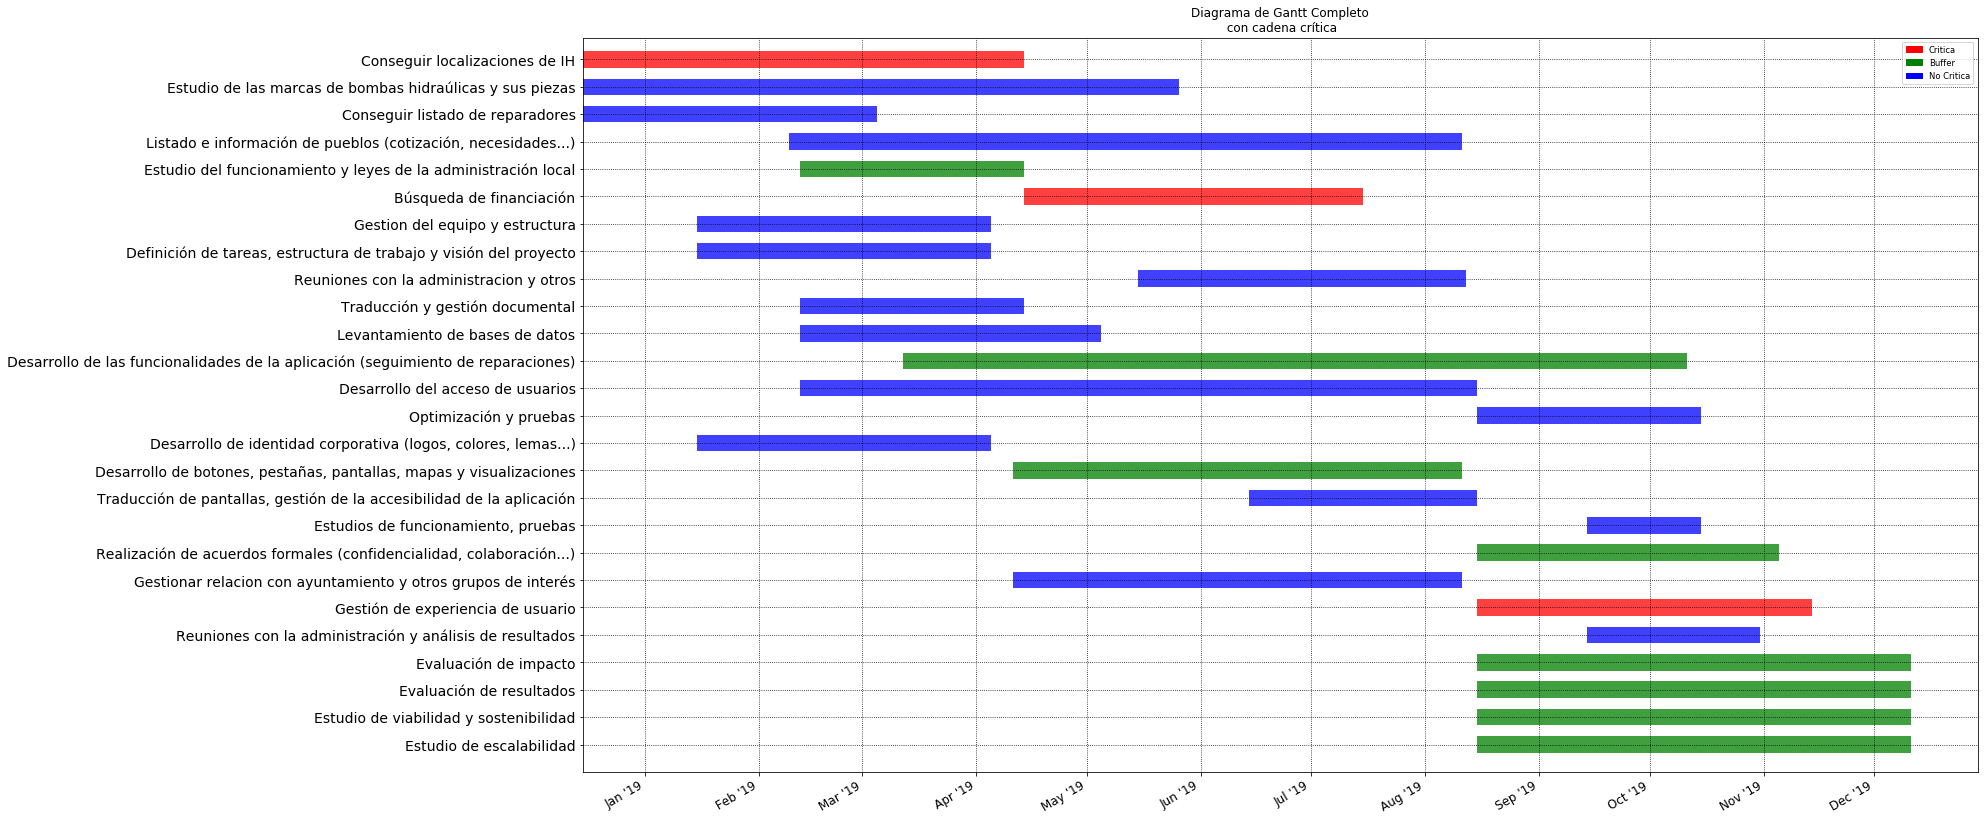

In [20]:

# Data
 
pos = np.arange(0.5,int(len(df)/2)+0.5,0.5)
 
ylabels = df['Task']



customDates = df[0:1].apply(lambda x: cosa(x,0),axis=1).append(df[1:].apply(lambda x: cosa(x,1),axis=1))
 
task_dates = {}
for i,task in enumerate(ylabels):
  task_dates[task] = customDates[i]

# Initialise plot
 
fig = plt.figure(figsize=(25, 15))
# ax = fig.add_axes([0.15,0.2,0.75,0.3]) #[left,bottom,width,height]
ax = fig.add_subplot(111)
 
# Plot the data

colors = {'Critica': 'r',
          'Buffer': 'g',
          'No Critica': 'b'
         }
 
start_date,end_date = task_dates[ylabels[0]]
ax.barh(0.5, end_date - start_date, left=start_date, height=0.3, align='center', color=colors[df.loc[0,'Cadena Critica']], alpha = 0.75)
for i in range(0,len(ylabels)-1):
  labels = ['Analysis','Reporting'] if i == 1 else [None,None]
  start_date,mid_date,end_date = task_dates[ylabels[i+1]]
  ax.barh((i*0.5)+1.0, mid_date - start_date, left=start_date, height=0.3, align='center', color=colors[df.loc[i+1,'Cadena Critica']], alpha = 0.75)

# Format the y-axis
 
locsy, labelsy = yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 14)
 
# Format the x-axis
 
ax.set_ylim(bottom = 0.1, top = int(len(df)/2)+0.5)
ax.grid(color = 'k', linestyle = ':')
 
ax.xaxis_date() #Tell matplotlib that these are dates...
 
rule = rrulewrapper(1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter("%b '%y")
 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=12)
 
# Format the legend
font = font_manager.FontProperties(size='small')
red_patch = mpatches.Patch(color='r', label='The red data')
green_patch = mpatches.Patch(color='g', label='The red data')
blue_patch = mpatches.Patch(color='b', label='The red data')
ax.legend(handles=[red_patch,green_patch,blue_patch],labels=colors,loc=1,prop=font)

# Finish up
ax.invert_yaxis()
ax.title.set_text('Diagrama de Gantt Completo\n con cadena crítica')

fig.autofmt_xdate()
plt.savefig('gantt_aguapp_critcal_chain.jpeg',bbox_inches='tight', pad_inches=2)
plt.show()

**Draw Gantt for each subsection**



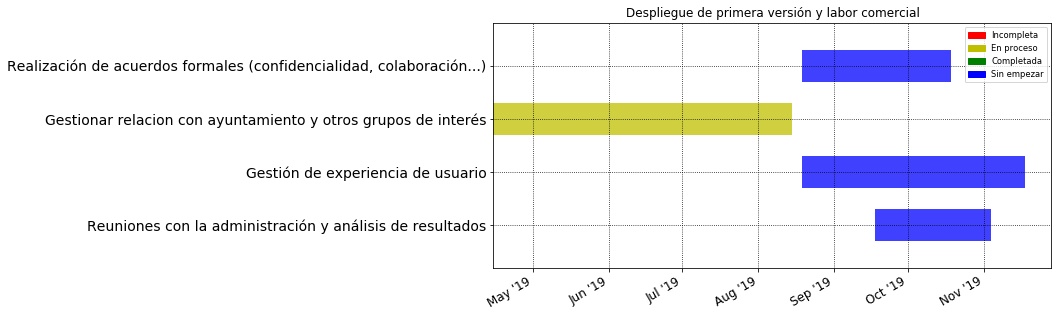

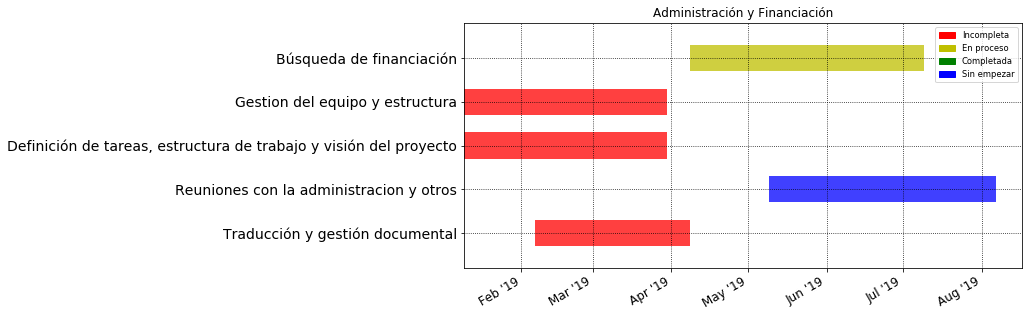

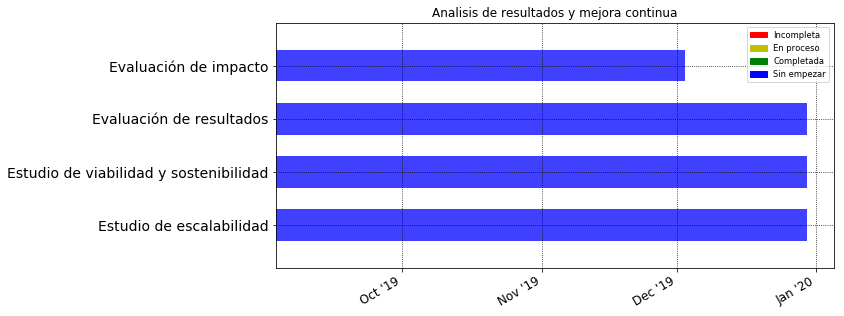

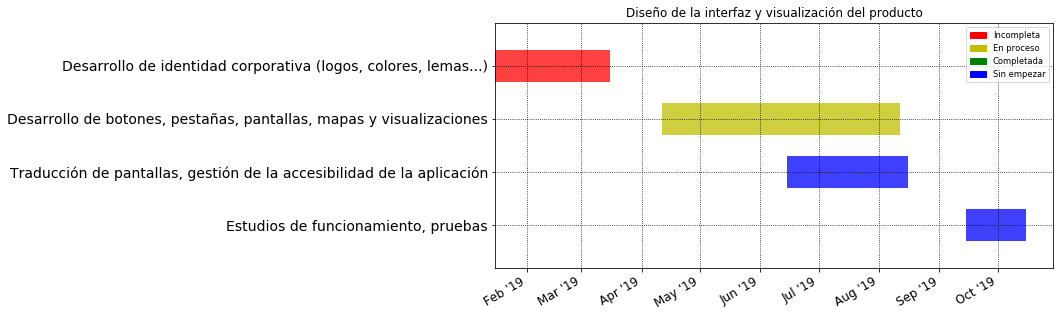

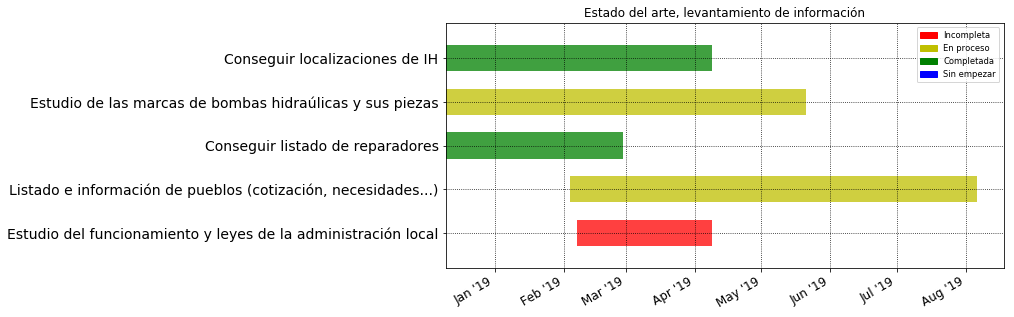

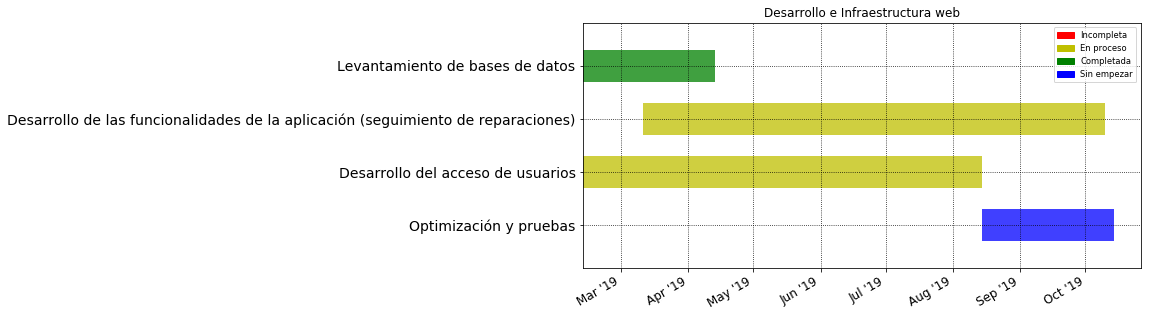

In [21]:
for titulo in set(df['Titulo'].to_list()):
  df_draw = df[df['Titulo']==titulo].copy()
  
  #reindex
  df_draw.index = pd.RangeIndex(len(df_draw.index))

  df_draw.index = range(len(df_draw.index))
  # Data

  pos = arange(0.5,int(len(df_draw)/2+0.5)+0.6,0.5)

  ylabels = df_draw['Task'].to_list()



  customDates = list(df_draw[0:1].apply(lambda x: cosa(x,0),axis=1).append(df_draw[1:].apply(lambda x: cosa(x,1),axis=1)))

  task_dates = {}
  for i,task in enumerate(ylabels):
    task_dates[task] = customDates[i]

  # Initialise plot

  fig = plt.figure(figsize=(10, 5))
  # ax = fig.add_axes([0.15,0.2,0.75,0.3]) #[left,bottom,width,height]
  ax = fig.add_subplot(111)

  # Plot the data

  colors = {'Incompleta': 'r',
            'En proceso': 'y',
            'Completada': 'g',
            'Sin empezar': 'b'}

  start_date,end_date = task_dates[ylabels[0]]
  ax.barh(0.5, end_date - start_date, left=start_date, height=0.3, align='center', color=colors[df_draw.loc[0,'Complete']], alpha = 0.75)
  for i in range(0,len(ylabels)-1):
    start_date,mid_date,end_date = task_dates[ylabels[i+1]]
    ax.barh((i*0.5)+1.0, mid_date - start_date, left=start_date, height=0.3, align='center', color=colors[df_draw.loc[i+1,'Complete']], alpha = 0.75)

  # Format the y-axis

  locsy, labelsy = yticks(pos,ylabels)
  plt.setp(labelsy, fontsize = 14)

  # Format the x-axis

  ax.set_ylim(bottom = 0.1, top = (int(len(df_draw)/2))+0.4+(len(df_draw)%2)/2)
  ax.grid(color = 'k', linestyle = ':')

  ax.xaxis_date() #Tell matplotlib that these are dates...

  rule = rrulewrapper(1, interval=1)
  loc = RRuleLocator(rule)
  formatter = DateFormatter("%b '%y")

  ax.xaxis.set_major_locator(loc)
  ax.xaxis.set_major_formatter(formatter)
  labelsx = ax.get_xticklabels()
  plt.setp(labelsx, rotation=30, fontsize=12)

  # Format the legend
  font = font_manager.FontProperties(size='small')
  red_patch = mpatches.Patch(color='r', label='The red data')
  green_patch = mpatches.Patch(color='g', label='The red data')
  yellow_patch = mpatches.Patch(color='y', label='The red data')
  blue_patch = mpatches.Patch(color='b', label='The red data')
  ax.legend(handles=[red_patch,yellow_patch,green_patch,blue_patch],labels=colors,loc=1,prop=font)

  # Finish up
  ax.invert_yaxis()
  ax.title.set_text(titulo)
  fig.autofmt_xdate()
  plt.rcParams['figure.figsize']= (20, 9.3)
  plt.savefig(str(titulo)+'.jpeg',bbox_inches='tight', pad_inches=2)
  plt.show()
  for i in range(5):
    print('\n')

FLOW DIAGRAM OF PROJECT ACTIVITIES

Text(0.5, 1.0, 'Diagrama de procesos del las actividades del proyecto')

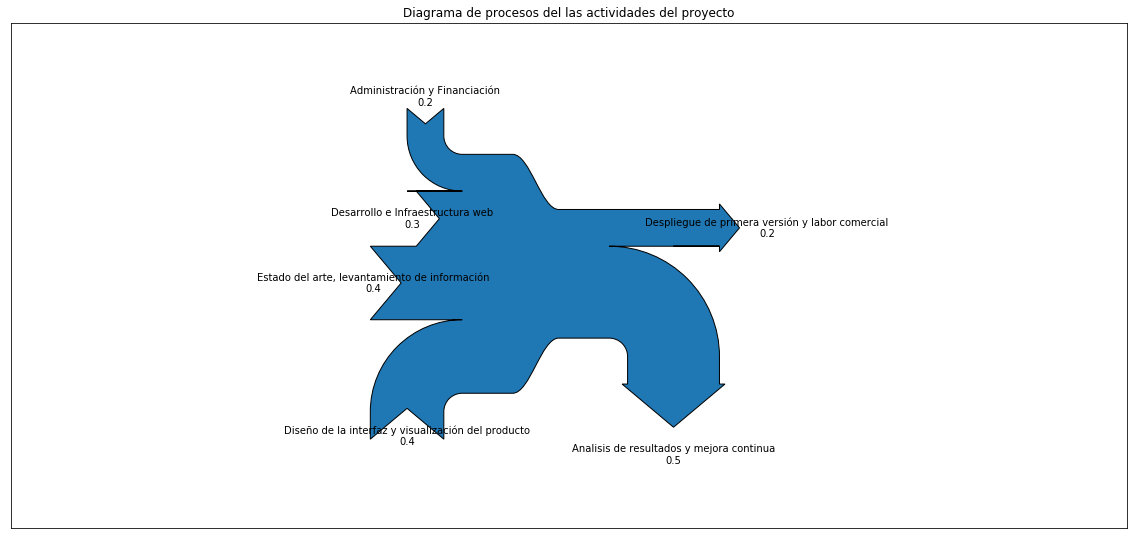

In [22]:


flows_dict = dict({'Administración y Financiación':0.2, 'Analisis de resultados y mejora continua':-0.5, 
         'Desarrollo e Infraestructura web':0.3, 'Despliegue de primera versión y labor comercial':-0.20, 
         'Diseño de la interfaz y visualización del producto':0.4, 'Estado del arte, levantamiento de información':0.4})
orientations_dict = dict({'Administración y Financiación':1, 'Analisis de resultados y mejora continua':-1, 
         'Desarrollo e Infraestructura web':0, 'Despliegue de primera versión y labor comercial':0, 
         'Diseño de la interfaz y visualización del producto':-1, 'Estado del arte, levantamiento de información':0})

flows = [flows_dict[key] for key in flows_dict]
orientations = [orientations_dict[key] for key in orientations_dict]

labels=[key for key in orientations_dict]

# basic sankey chart
Sankey(flows=flows, labels=labels, orientations=orientations).finish()
plt.title("Diagrama de procesos del las actividades del proyecto")



FLOW DIAGRAM WITH RECIRCULATION

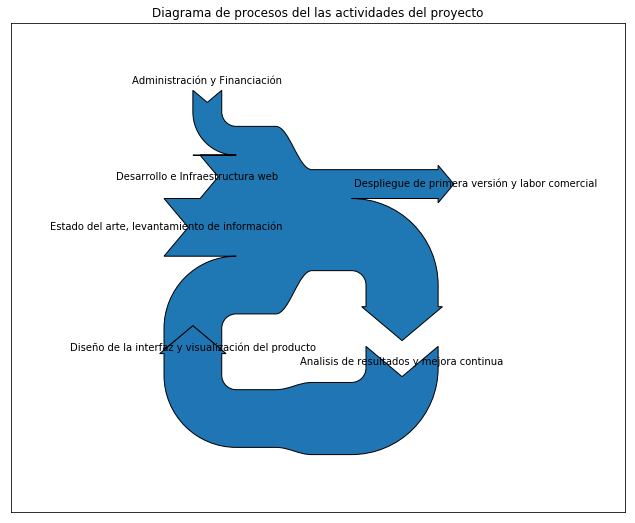

In [24]:


# Example 1 -- Mostly defaults
# This demonstrates how to create a simple diagram by implicitly calling the
# Sankey.add() method and by appending finish() to the call to the class.
flows_dict = dict({'Administración y Financiación':0.2, 'Analisis de resultados y mejora continua':-0.5, 
         'Desarrollo e Infraestructura web':0.3, 'Despliegue de primera versión y labor comercial':-0.20, 
         'Diseño de la interfaz y visualización del producto':0.4, 'Estado del arte, levantamiento de información':0.4})
orientations_dict = dict({'Administración y Financiación':1, 'Analisis de resultados y mejora continua':-1, 
         'Desarrollo e Infraestructura web':0, 'Despliegue de primera versión y labor comercial':0, 
         'Diseño de la interfaz y visualización del producto':-1, 'Estado del arte, levantamiento de información':0})
length_dict = dict({'Administración y Financiación':0.25, 'Analisis de resultados y mejora continua':0.25, 
         'Desarrollo e Infraestructura web':0.25, 'Despliegue de primera versión y labor comercial':0.25, 
         'Diseño de la interfaz y visualización del producto':0.25, 'Estado del arte, levantamiento de información':0.25})

flows = [flows_dict[key] for key in flows_dict]
orientations = [orientations_dict[key] for key in orientations_dict]
length = [length_dict[key] for key in length_dict]
labels=[key for key in orientations_dict]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Diagrama de procesos del las actividades del proyecto")
flows = flows
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, labels=labels,
           orientations=orientations)
sankey.add(flows=[0.5, -0.4],
           orientations=[-1, -1], prior=0, connect=(4, 1), fc='#2076B4',alpha=1)

diagrams = sankey.finish()
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.
plt.rcParams['figure.figsize']= (11, 9)

plt.show()

TREE DIAGRAM OF THE PROJECT ACTIVITES

In [0]:

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

u = Digraph('unix', filename='EDP_AGUAPP_2')
u.attr(size='100,200')
u.attr('node', shape='box',fontsize='35')
u.node_attr.update(color='lightblue2',style='filled')

for title in set(df['Titulo'].to_list()):
  u.attr('node', size='10,20',shape='box',fontsize='35')
  u.edge('APPLICACION', str(title))
  for i,task in enumerate(df[df['Titulo']==title]['Task'].to_list()):
    u.attr('node', size='10,18',shape='box',fontsize='20')
    if(i==0):
      u.edge(title, str(task),len='20.00')
    else:
      u.edge(task_1, str(task),len='200.00')
    task_1=task
u.attr()

u.view()


'EDP_AGUAPP_2.pdf'

# GRUPOS DE INTERES

COGER DATOS DE LOS GRUPOS DE INTERÉS SU PODER Y OTRAS CARACTERÍSTICAS

In [0]:
SPREADSHEET_ID = ID2
RANGE_NAME = 'Sheet1'

gsheet = sheet_service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()


In [0]:
df_interes = pd.DataFrame(gsheet.get('values', [])[1:],columns= gsheet.get('values', [])[0:1][0])

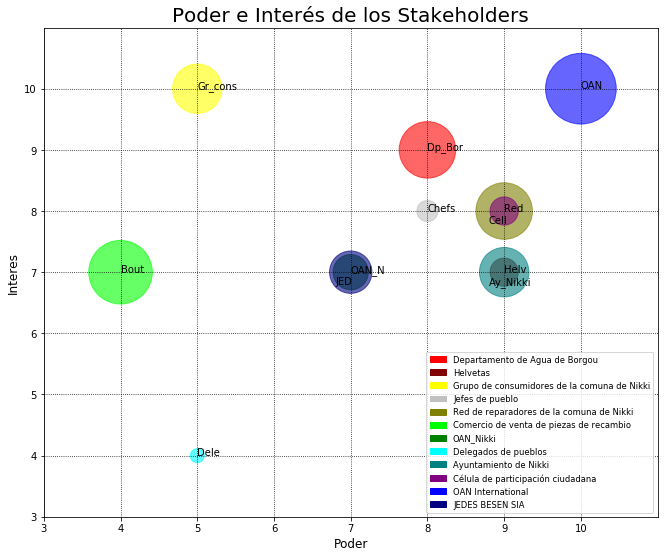

In [28]:
fig, ax = plt.subplots()
N=len(df_interes)
sort='Color'
x, y = [np.array(list(map(int,df_interes.sort_values(by=[sort])['Poder']))),np.array(list(map(int,df_interes.sort_values(by=[sort])['Interes'])))]
s = np.array(list(map(int,df_interes.sort_values(by=[sort])['Gestion'])))
s = [s*s*0.5*100 for s in s]

scatter = ax.scatter(x, y, s=s,marker='o',color=df_interes['Color'].to_list(),label=df_interes['Grupo de Interes'].to_list(),alpha=0.6)
handles =[mpatches.Patch(color=color, label='The red data') for color in df_interes['Color'].to_list()]
ax.grid(color = 'k', linestyle = ':')
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,11,1))
ax.set_xbound(lower=3, upper=11)
ax.set_ybound(lower=3, upper=11)

ax.set_xlabel('Poder',fontsize=12)
ax.set_ylabel('Interes',fontsize=12)
ax.set_title('Poder e Interés de los Stakeholders',fontsize=20)
ax.legend(handles=handles,labels=df_interes.sort_values(by=[sort])['Grupo de Interes'].to_list(),loc=0,prop=font)
nick = df_interes.sort_values(by=[sort])['Nickname'].to_list()
repet = []
for i, txt in enumerate(nick):
  code=0
  if[x[i],y[i]] in repet:
    ax.annotate(txt, (x[i]-0.2, y[i]-0.2))
  else:
    ax.annotate(txt, (x[i], y[i]))
      
  repet.append([x[i],y[i]])

plt.show()

# PRESUPUESTO

In [0]:
SPREADSHEET_ID = ID3
RANGE_NAME = 'Sheet1'

gsheet = sheet_service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()

df_budget = pd.DataFrame(gsheet.get('values', [])[1:],columns= gsheet.get('values', [])[0:1][0])

In [0]:
#Cambiar el tipo de datos a integer
df_budget['Total']=list(map(int,df_budget['Total']))

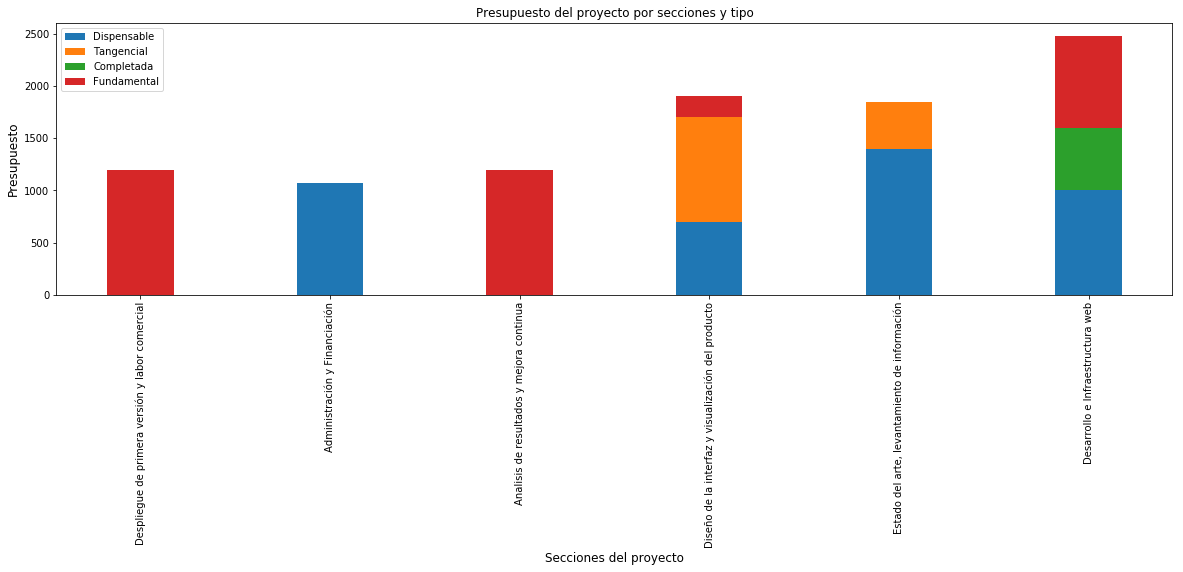

In [37]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1,title="Presupuesto del proyecto por secciones y tipo")

#number of points in the graph
x= np.arange(len(set(df_budget['Sección'].to_list())))
width = 0.35 
y = [[] for a in list(set(df_budget['Tipo'].to_list()))]
#the different y values for each section

for i,tipo in enumerate(list(set(df_budget['Tipo'].to_list()))):
  df_tipo = df_budget[df_budget['Tipo']==tipo]
  for seccion in list(set(df_budget['Sección'].to_list())):
    y[i].append(df_tipo[df_tipo['Sección']==seccion]['Total'].sum())

#create the plots
p=[]
bottom=[]
for i,tipo in enumerate(set(df_budget['Tipo'].to_list())):
  y[i]=np.array(y[i])
  y[i]=np.array(list(map(int,y[i])))
  if i==0:
    p.append(ax.bar(x, y[i], width))
    bottom=y[i].copy()
  else:
    p.append(ax.bar(x, y[i], width, bottom=bottom))
    bottom=np.add(bottom,y[i])
  
ax.set_xlabel('Secciones del proyecto',fontsize=12)
ax.set_ylabel('Presupuesto',fontsize=12)
plt.xticks(x, set(df_budget['Sección'].to_list()),rotation='vertical')
plt.legend([p_plot[0] for p_plot in p], list(set(df_budget['Tipo'].to_list())))

plt.savefig('Presupuesto del proyecto por secciones y tipo.jpeg',bbox_inches='tight', pad_inches=2)


plt.show()

PIE CHART

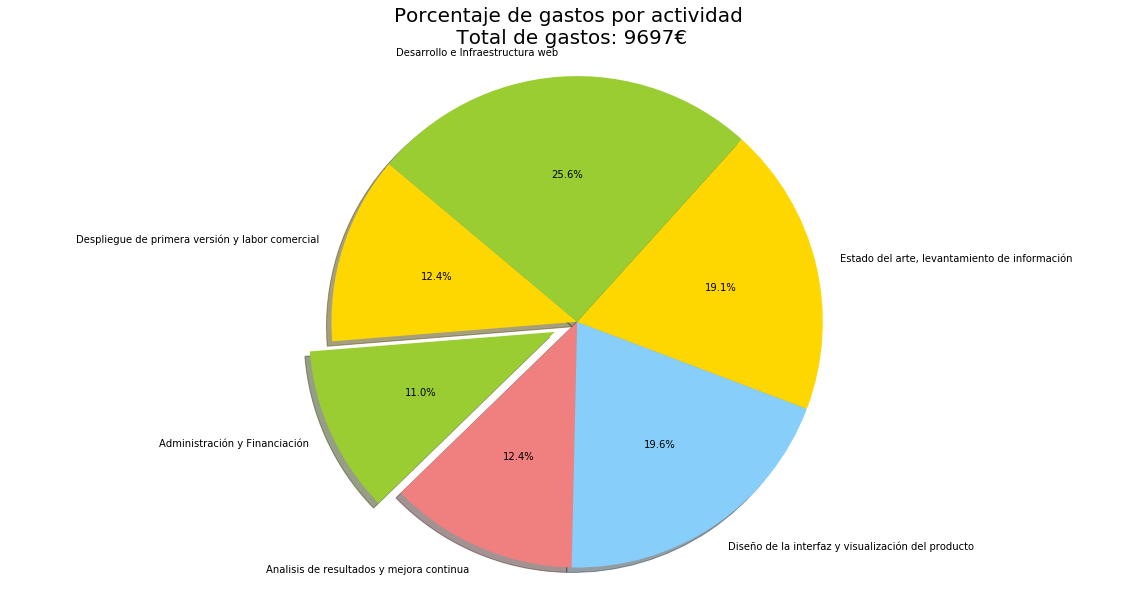

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

labels = list(set(df_budget['Sección'].to_list()))
sizes = [df_budget[df_budget['Sección']==a]['Total'].sum() for a in labels]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0,0,0)  # explode max slice

# Plot
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Porcentaje de gastos por actividad\n Total de gastos: "+str(df_budget['Total'].sum())+'€', fontsize=20)
plt.savefig('Porcentaje de gastos por actividad.jpeg')
plt.axis('equal')
plt.show()

In [0]:
SPREADSHEET_ID = ID4
RANGE_NAME = 'Sheet1'

gsheet = sheet_service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()

df_riesgos = pd.DataFrame(gsheet.get('values', [])[1:],columns= gsheet.get('values', [])[0:1][0])


In [0]:
df_riesgos['Probabilidad']=list(map(int,df_riesgos['Probabilidad']))
df_riesgos['Impacto']=list(map(int,df_riesgos['Impacto']))
df_riesgos['Posibilidad de mitigación']=list(map(int,df_riesgos['Posibilidad de mitigación']))
df_riesgos=df_riesgos.set_index('Riesgo')

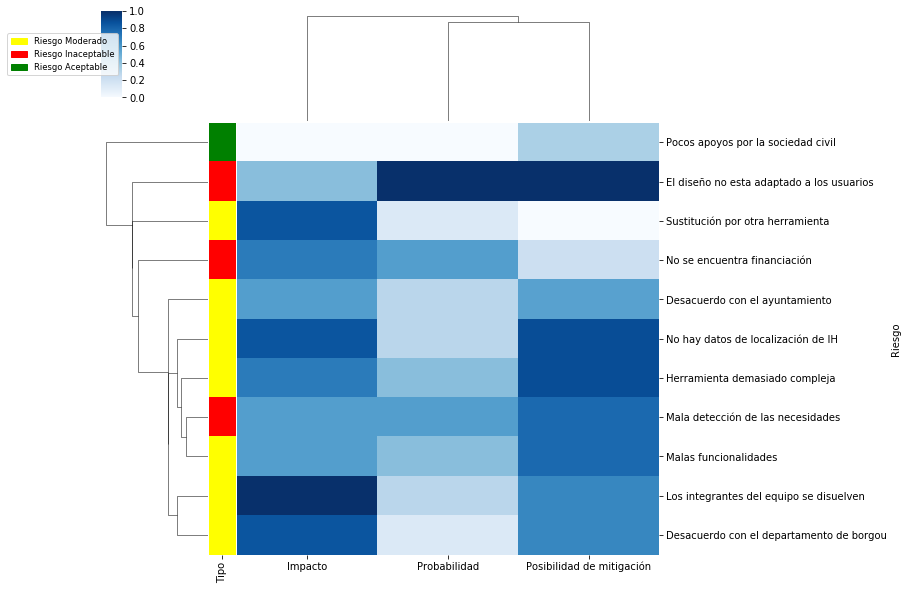

In [43]:
  
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df_riesgos['Tipo'].unique(), ["yellow","red","green"]))
row_colors = df_riesgos['Tipo'].map(my_palette)
# plot
sns.clustermap(df_riesgos[['Probabilidad',	'Impacto',	'Posibilidad de mitigación']],  method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)
red_patch = mpatches.Patch(color='r', label='The red data')
green_patch = mpatches.Patch(color='g', label='The red data')
yellow_patch = mpatches.Patch(color='yellow', label='The red data')
plt.legend(handles=[yellow_patch,red_patch,green_patch],labels=list(df_riesgos['Tipo'].unique()),loc=5,prop=font)
plt.show()